## Importing required libraries -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format

## Loading the dataset -

In [4]:
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\cubic_zirconia.csv')

## Performing EDA & Data Cleaning -

In [5]:
data.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
12271,12272,1.00,Very Good,E,SI1,63.70,55.00,6.35,6.40,4.06,5413
19641,19642,0.41,Premium,E,SI1,60.40,59.00,4.80,4.75,2.88,775
18446,18447,0.82,Ideal,I,SI2,61.10,57.00,6.05,6.09,3.71,2075
23183,23184,1.51,Very Good,I,VS1,61.80,63.00,7.28,7.34,4.52,9467
24846,24847,0.70,Ideal,H,SI1,61.40,57.00,5.73,5.70,3.51,2383
4587,4588,0.40,Ideal,I,IF,62.40,56.00,4.73,4.70,2.94,1050
20924,20925,0.50,Premium,F,SI1,59.10,58.00,5.23,5.19,3.08,1286
8699,8700,0.77,Ideal,J,VS2,61.90,54.00,5.89,5.94,3.66,2292
5382,5383,0.30,Ideal,E,VVS2,62.30,56.00,4.30,4.34,2.69,766
3780,3781,1.09,Very Good,G,VS1,62.50,59.00,6.56,6.59,4.11,6546


### Shape of the dataset -

In [6]:
data.shape

(26967, 11)

In [7]:
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  26967
No. of columns:  11


The dataset contains 26967 rows and 11 columns.

One of the columns 'Unnamed: 0' just represents the row number of it is useless for our analysis. 
Hence, it must be dropped.

In [8]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.00,0.80,0.48,0.20,0.40,0.70,1.05,4.50
depth,26270.00,61.75,1.41,50.80,61.00,61.80,62.50,73.60
table,26967.00,57.46,2.23,49.00,56.00,57.00,59.00,79.00
x,26967.00,5.73,1.13,0.00,4.71,5.69,6.55,10.23
y,26967.00,5.73,1.17,0.00,4.71,5.71,6.54,58.90
z,26967.00,3.54,0.72,0.00,2.90,3.52,4.04,31.80
price,26967.00,3939.52,4024.86,326.00,945.00,2375.00,5360.00,18818.00


### Checking for null values -

In [11]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

The column 'depth' contains 697 null values.

### Checking for duplicate rows -

In [12]:
duplicate_rows = data[data.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  34


There are 34 duplicate rows in this dataset.
These rows should be dropped coz they are redundant and do not add any value to our analysis.

### Dropping all duplicate rows -

In [13]:
data.drop_duplicates(inplace=True)
print("No. of rows after dropping duplicates: ", data.shape[0])

No. of rows after dropping duplicates:  26933


### Imputing the null values -

In [14]:
print("Mean: {:.2f}".format(data['depth'].mean()))
print("Median: {:.2f}".format(data['depth'].median()))

Mean: 61.75
Median: 61.80


These values could be replaced with either the mean or the median of the entire column.
In this case both the mean and the median are approximately equal i.e. around 61.8

In [15]:
data['depth'].fillna(61.8, inplace=True)

### Data type of the variables -

In [16]:
numerical_data = data.select_dtypes(include='number')
num_cols = numerical_data.columns
print("Numerical columns: ", num_cols)

Numerical columns:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [17]:
categorical_data = data.select_dtypes(exclude='number')
cat_cols = categorical_data.columns
print("Categorical columns: ", cat_cols)

Categorical columns:  Index(['cut', 'color', 'clarity'], dtype='object')


Out of remaining 10 columns, 3 independent variables are of object type.
Rest of the independent variables are floating point values.
The dependent variable 'price' is of integer type.

### Checking for outliers -

In [18]:
for col in num_cols:
    print("Column name - ", col)
    print("Mean: {:.2f}".format(data[col].mean()))
    print("Std: {:.2f}".format(data[col].std()))

Column name -  carat
Mean: 0.80
Std: 0.48
Column name -  depth
Mean: 61.75
Std: 1.39
Column name -  table
Mean: 57.46
Std: 2.23
Column name -  x
Mean: 5.73
Std: 1.13
Column name -  y
Mean: 5.73
Std: 1.17
Column name -  z
Mean: 3.54
Std: 0.72
Column name -  price
Mean: 3937.53
Std: 4022.55


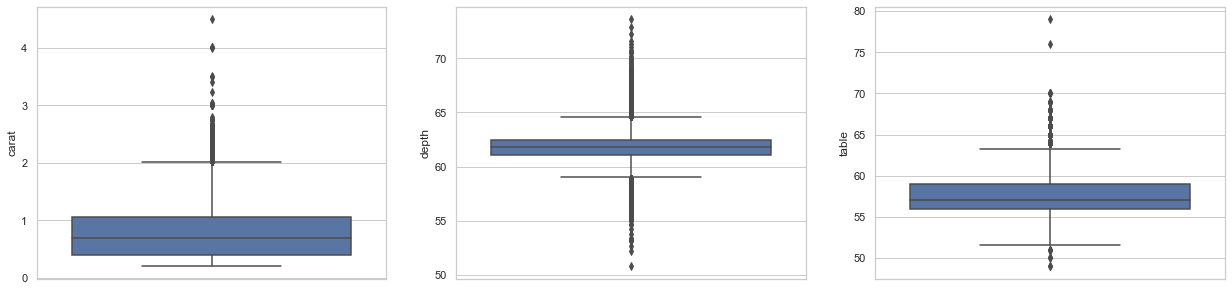

In [19]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['carat'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['depth'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['table'])

plt.show()

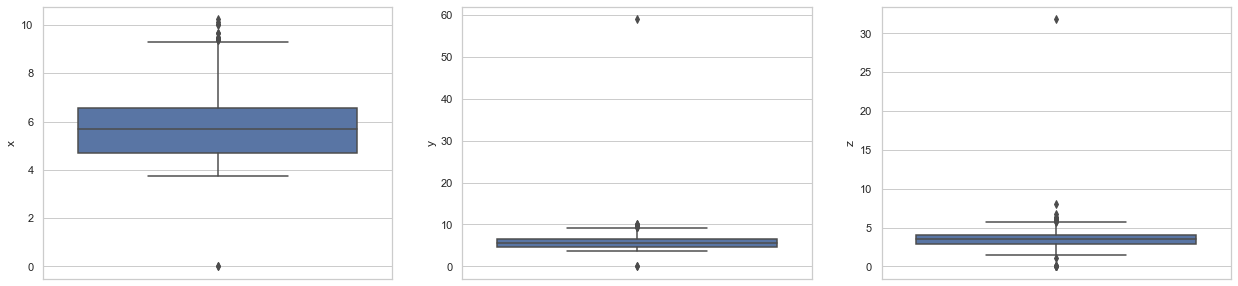

In [20]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['x'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['y'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['z'])

plt.show()

It seems like there are some outliers present in the dataset. So, we'll have to remove them.

### Inter Quartile Range -

In [21]:
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat      0.65
depth      1.40
table      3.00
x          1.84
y          1.83
z          1.14
price   4411.00
dtype: float64


### Removing any potential outliers -

In [22]:
data = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
print("No. of rows remaining: ", data.shape[0])

No. of rows remaining:  23615


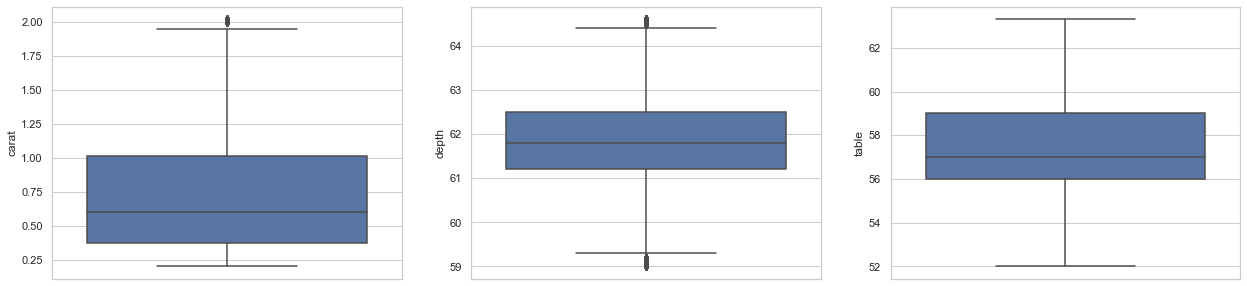

In [23]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['carat'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['depth'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['table'])

plt.show()

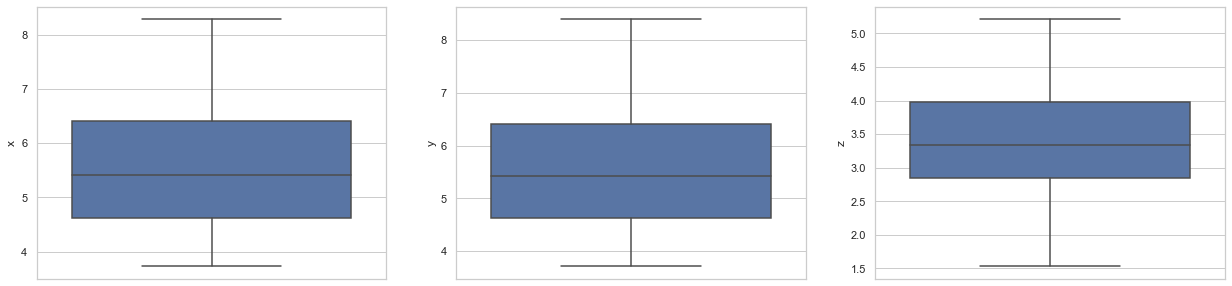

In [24]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['x'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['y'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['z'])

plt.show()

## Analysis of Categorical columns -

Data distribution based on the cut quality of cubic zirconia -

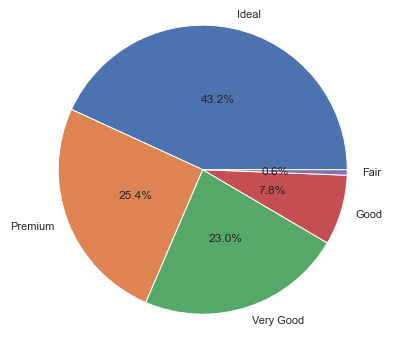

In [25]:
x = data['cut'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=data['cut'].unique(), autopct='%1.1f%%', pctdistance=0.5)
plt.axis('equal')
plt.show()

The pie chart shows that most of the diamonds are of Ideal cut quality, followed by Premium and Very Good.

Data distribution based on the color of cubic zirconia -

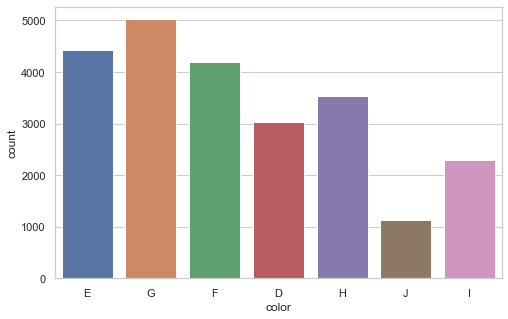

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='color', data=data)
plt.show()

This shows that most of the diamonds are of color 'G', followed by 'E' and 'F'.

Data distribution based on the clarity of cubic zirconia -

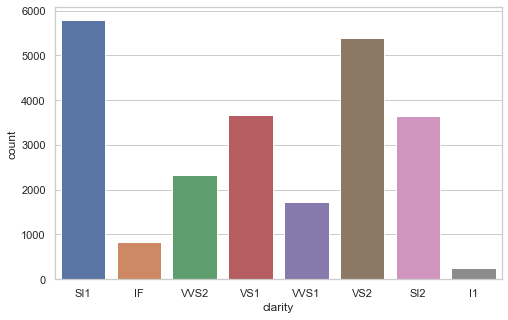

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='clarity', data=data)
plt.show()

The above graph shows that most of the diamonds are of SI1 quality, followed by VS2 and VS1.

Average price categrized by Cut, Color & Clarity of the diamonds -

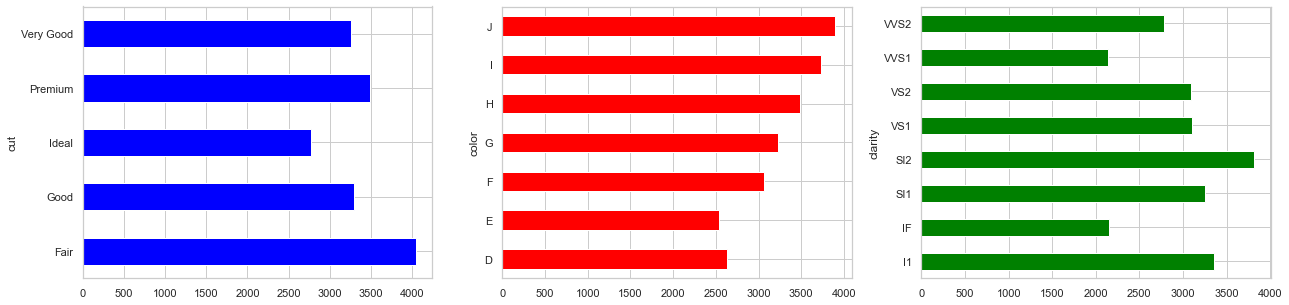

In [28]:
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
data['price'].groupby(data['cut']).mean().plot(kind='barh', color='blue')

plt.subplot(1, 3, 2)
data['price'].groupby(data['color']).mean().plot(kind='barh', color='red')

plt.subplot(1, 3, 3)
data['price'].groupby(data['clarity']).mean().plot(kind='barh', color='green')

plt.show()

Therefore, the average price of the diamonds is maximum for those with Fair quality, 'J' color and SI2 clarity.

## Analysis of Numerical variables -

### Checking the distribution of data -

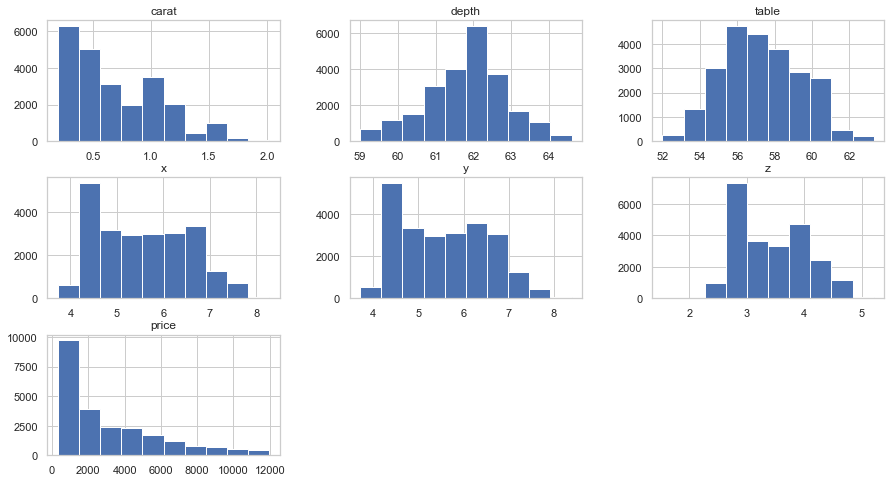

In [29]:
data[num_cols].hist(figsize=(15, 8))
plt.show()

In [30]:
data[num_cols].skew()

carat    0.72
depth   -0.20
table    0.39
x        0.27
y        0.26
z        0.27
price    1.21
dtype: float64

Here, we can clearly see that the 'price' and 'carat' columns are highly skewed towards the right.

In [31]:
data[num_cols].kurt()

carat   -0.34
depth    0.01
table   -0.16
x       -1.10
y       -1.11
z       -1.10
price    0.67
dtype: float64

In [32]:
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(9, 4))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.show()

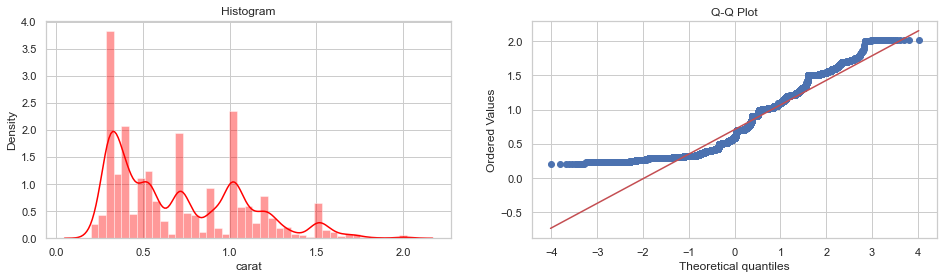

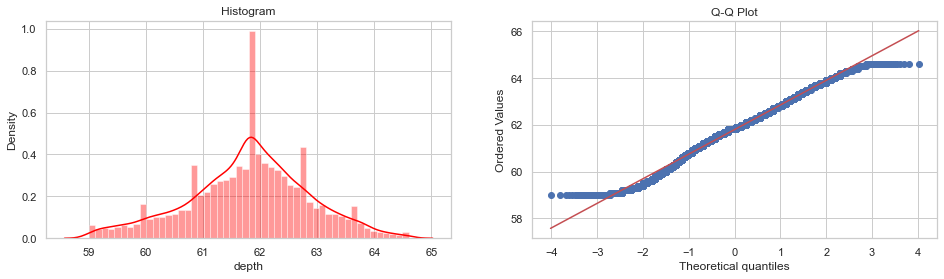

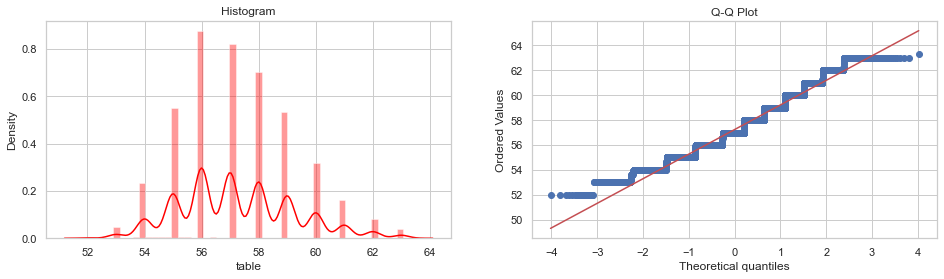

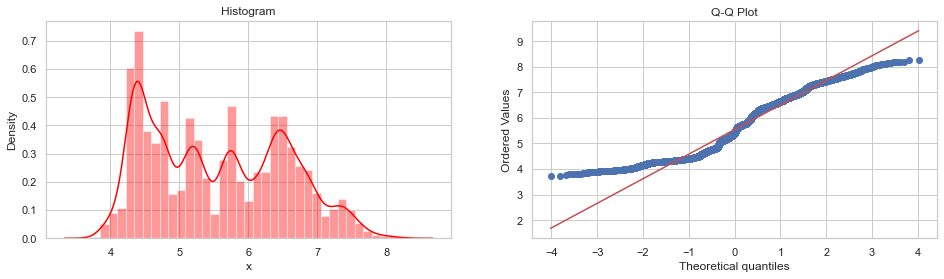

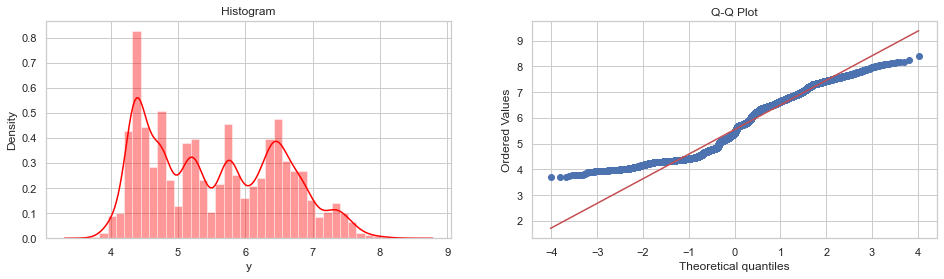

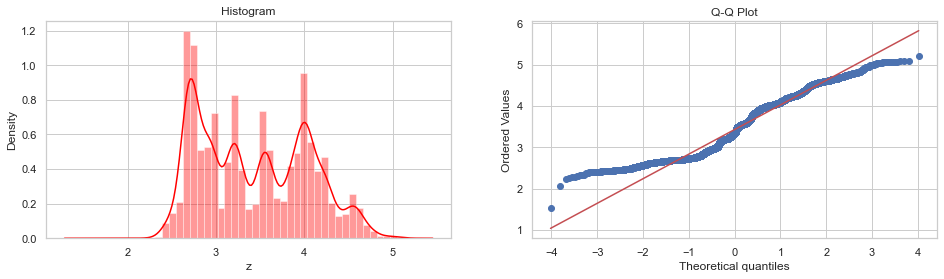

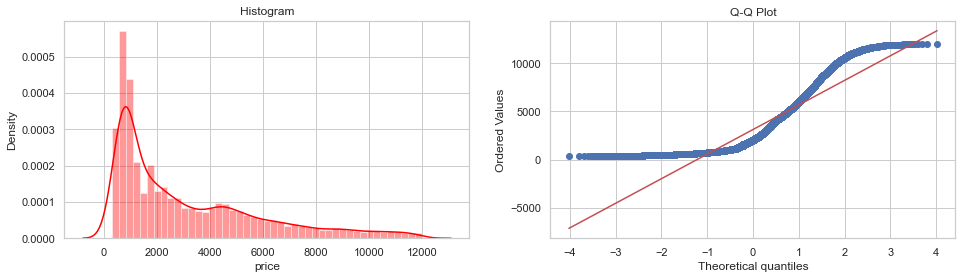

In [33]:
for col in num_cols:
    diagnostic_plot(data, col)

### Checking the correlation between independent variables -

In [34]:
X = data.drop('price', axis=1)
X.corr(method='spearman')

,carat,depth,table,x,y,z
carat,1.00,0.05,0.19,1.00,1.00,1.00
depth,0.05,1.00,-0.18,-0.00,-0.01,0.11
table,0.19,-0.18,1.00,0.19,0.18,0.16
x,1.00,-0.00,0.19,1.00,1.00,0.99
y,1.00,-0.01,0.18,1.00,1.00,0.99
z,1.00,0.11,0.16,0.99,0.99,1.00


The dimension columns x, y & z are highly correlated with each other.
The 'carat' columns is highly correlated with each one of the dimension columns.
Hence, we might remove 1 or 2 of these columns to avoid multi-collinearity.

### Checking the correlation of independent variables with dependent variable -

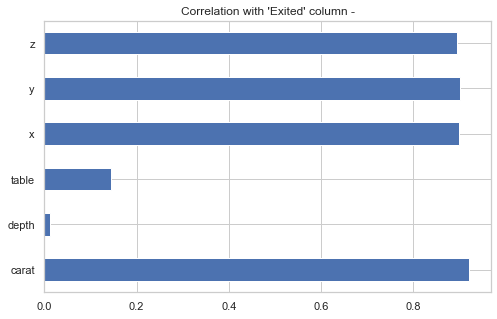

In [35]:
plt.figure(figsize=(8, 5))
X.corrwith(data['price']).plot(kind='barh', title="Correlation with 'Exited' column -")
plt.show()

The columns 'depth' & 'table' have significantly low correlation (0.02 & 0.18 repectively) with the output column 'price'.
They are not contributing much towards the generation of a particular outcome. 
Hence, they must be removed to reduce the dimensionality of the dataset.

### Plotting the Correlation Matrix

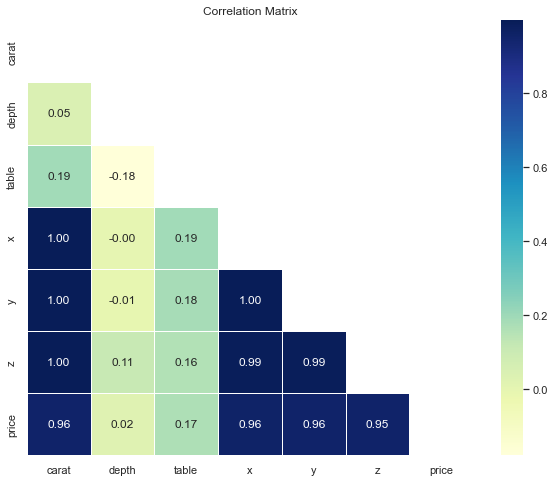

In [36]:
plt.figure(figsize = (10, 8))
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

## Multivariate Analysis -

<Figure size 1440x1440 with 0 Axes>

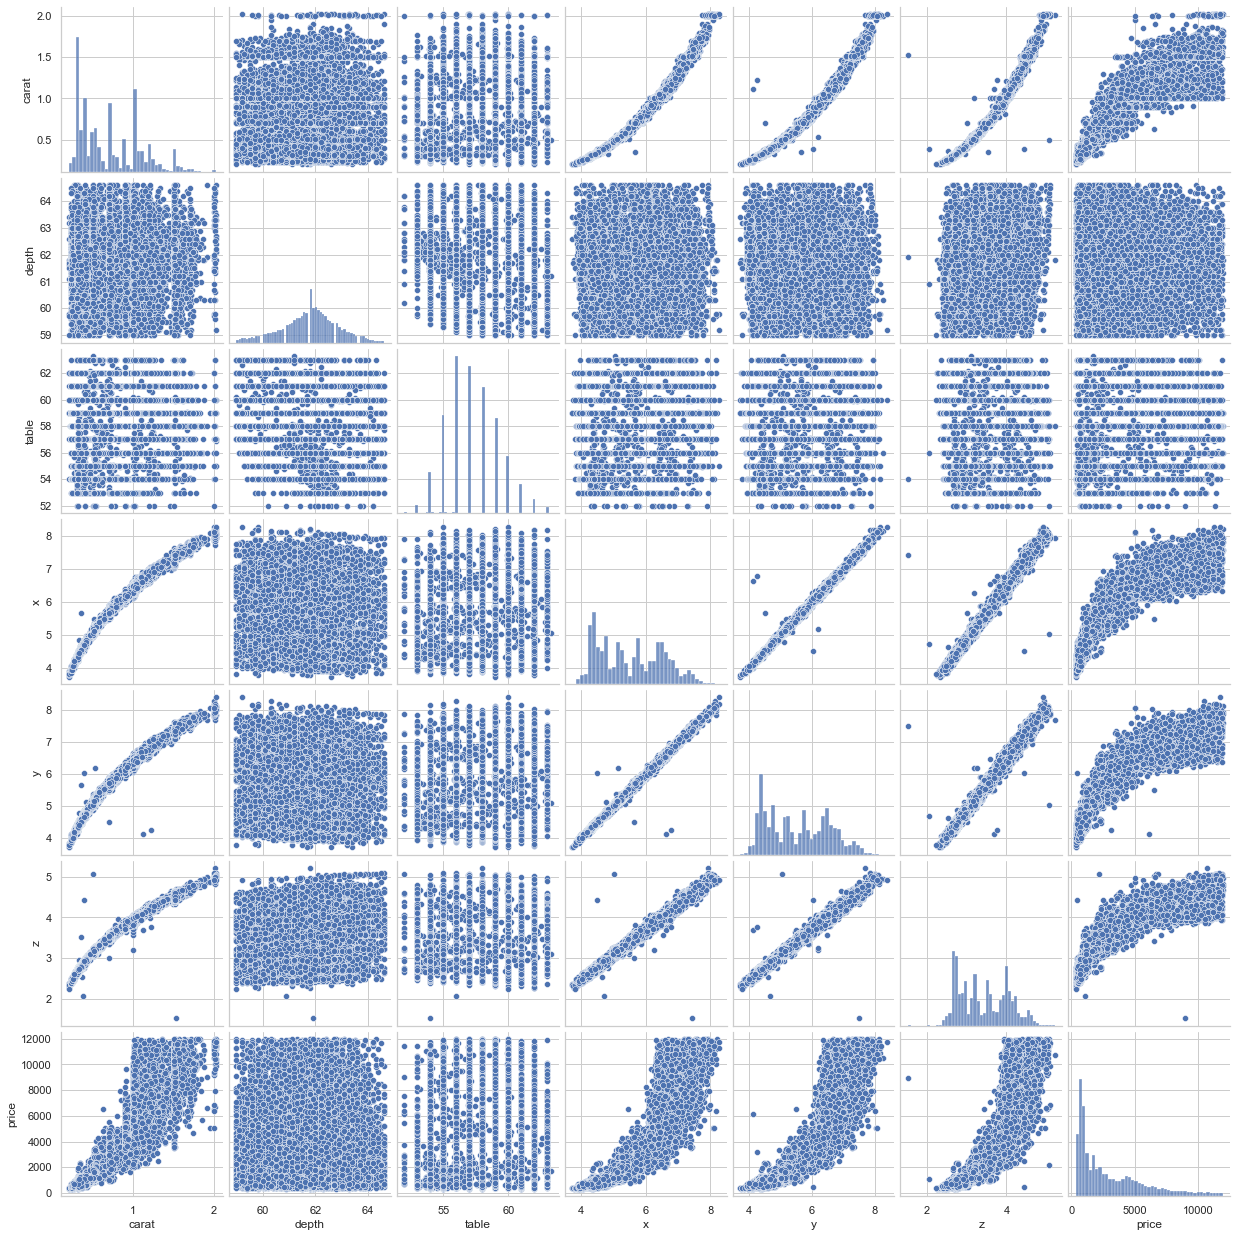

In [37]:
plt.figure(figsize=(20, 20))
sns.pairplot(data)
plt.show()